##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 46***

***Project number : 3 (Air quality prediction)***

---

**Full names of all students in the team:**

SIDDARTH ANNAMANENI , ROHIT REDDY DAREDDY , PREETHAM REDDY KASARLA , BILAKANTI SATHWIKA REDDY , ADITYA BALASUBRAMANIAN.

---

**Id number of all students in the team:**

2021A3PS1551H , 2021A7PS0372H ,2021A3PS0777H ,2021A7PS0225H,2021A8PS1475H



# **_1. Preprocessing of Dataset_**

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Set a seed value for NumPy random number generator
SEED=42
np.random.seed(SEED)

## Read Dataset
1. Upload dataset file in proejct read directory.
2. keep csv file name as 'dataset.csv'

[Dataset Link](https://docs.google.com/spreadsheets/d/1krSVpZPR_9H29m8DFayIRz1eGYPihJXr_HzD2ibaVRk/edit#gid=0)

In [2]:
df = pd.read_csv('dataset.csv', decimal=",")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,7.578
1,10/03/2004,19.00.00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,7.255
2,10/03/2004,20.00.00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,7.502
3,10/03/2004,21.00.00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,7.867
4,10/03/2004,22.00.00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,7.888


## Convert Date and Time in single column for calculating AQI.
This conversion is necessary because AQI calculation depends on 24H and 8H time window.


In [3]:
# convert Date time column as Date object and also add new column Date_time for AQI calculation
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.time
df['Date_Time'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format='%Y-%m-%d %H:%M:%S')

df = df.sort_values('Date_Time', ascending=True).reset_index(drop=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,7.578,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,7.255,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,7.502,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,7.867,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,7.888,2004-03-10 22:00:00


#Exploratory data analysis (EDA)
Analysis data is very importend to undertand data pattern which help to build and train ML model.


In [4]:
# shape of our dataset
# df.shape
print("No of rows in dataset:",df.shape[0])
print("No of columns in dataset:",df.shape[1])

No of rows in dataset: 9357
No of columns in dataset: 16


In [5]:
# getting the dtypes of the all columns
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)               int64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)             int64
NOx(GT)                   int64
PT08.S3(NOx)              int64
NO2(GT)                   int64
PT08.S4(NO2)              int64
PT08.S5(O3)               int64
T                       float64
RH                      float64
AH                      float64
Date_Time        datetime64[ns]
dtype: object

In [6]:
# getting the numerical estimates of all the numerical column
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,2.031145
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,40.955855
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,6.923000
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,9.768000
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,12.962000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,22.310000


## Dataset insights based on data description
This dataset consists of 9357 entries with measurements related to air quality. The columns include various parameters such as carbon monoxide levels (CO), non-methane hydrocarbons (NMHC), benzene (C6H6), nitrogen oxides (NOx), nitrogen dioxide (NO2), and ozone (O3), among others. The data provides information on mean, standard deviation, minimum, maximum, and quartile values for each parameter. Notably, some entries have missing or invalid values represented as -200. The dataset covers a range of air quality indicators and can be used for analysis and modeling to understand the patterns and trends in air pollution.


## Next step based on this data analysis
1. Need to handle missing value (None/np.na)
2. Need to handle mislabel -200 value
3. Need to handle outliner

# None value and -200 handling


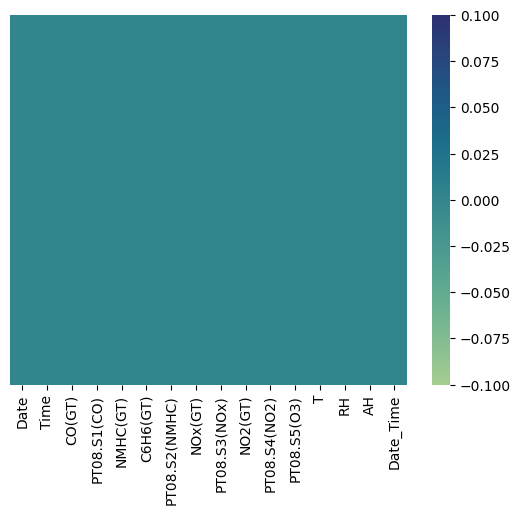

In [7]:
# no null values are now present in the dataset which was provided
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

Based on this heatmap, we found there is no missing or None value. Now need to handle -200 valuee.

Step:
1. At first need to replace -200 as np.nan
2. Then generage Heat map again to insight visualized
3. After That need to take necessary steps

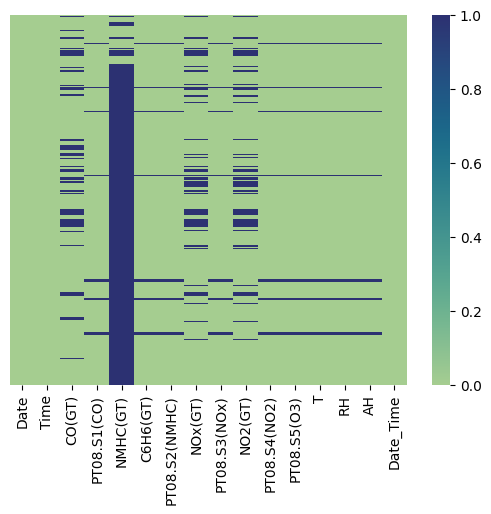

In [8]:
#first labelling -200 value as null value
df.replace(to_replace=-200,value=np.nan,inplace=True)

# heat map
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

## Action
1. This heat map shows MNHC(GT) colum is mostly None or -200, Therefore we can remove this column.
2. Others columns need to full fill missing value with mean of the column value.

In [9]:
#NMHC column has a lot of null values. We can drop the column!
df.drop(columns=['NMHC(GT)'],inplace=True)

In [10]:
#Since the data is real valued, we should replace all the null values with mean of each column
col = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']

for i in col:
    df[i] = df[i].fillna(df[i].mean())

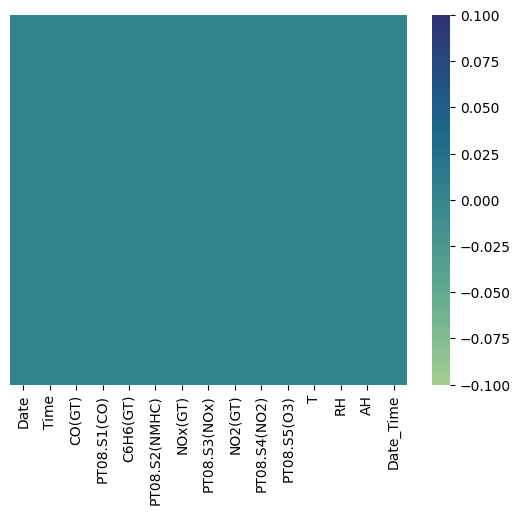

In [11]:
# heat map
sns.heatmap(df.isna(),yticklabels=False,cmap='crest')
plt.show()

### So now again dataset have no missing or misslebel data.
Now need to handle outliers

# Handling Outliers

Box plot help us to understand outliers values and pattern
Step:
1. Getting the quartile one and quartile 3 values of each column
2. if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR, then it is been defined as outlier
3. Replacing all the outliers using the median of that particular column

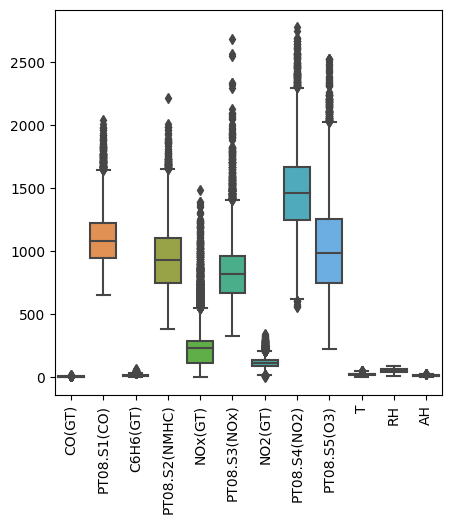

In [12]:
# plotting a boxplot
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

In [13]:
# getting the quartile one and quartile 3 values of each column
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1

In [14]:
# if the values fall behind Q1 - (1.5 * IQR) or above Q3 + 1.5*IQR,
#then it is been defined as outlier
((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

CO(GT)           454
PT08.S1(CO)      145
C6H6(GT)         286
PT08.S2(NMHC)     91
NOx(GT)          778
PT08.S3(NOx)     278
NO2(GT)          380
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64

In [15]:
mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
mask.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

In [17]:
# outliers are now being handled and are replaced with that column's median value
((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

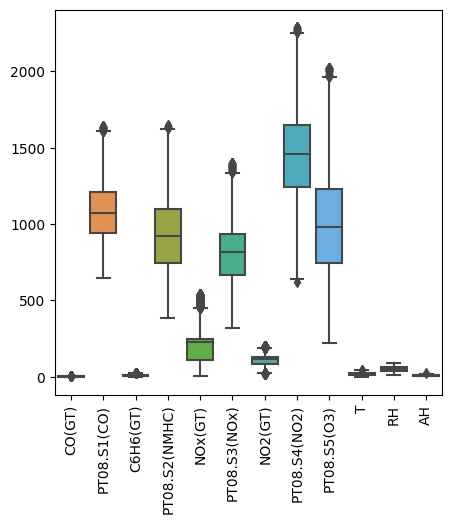

In [18]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

## Find correlations between attributes

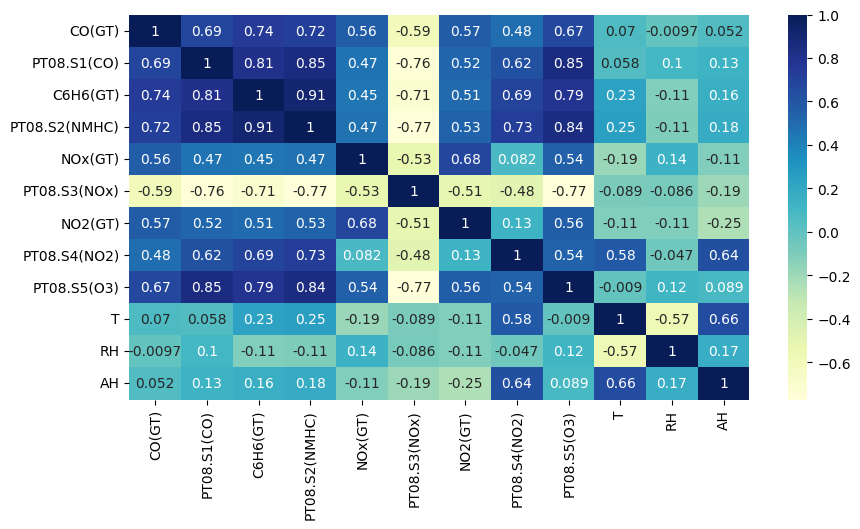

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df[col].corr(),cmap='YlGnBu',annot=True)
plt.show()

# Calculating AQI

The Air Quality Index (AQI) is a numerical scale used to convey the level of air pollution and its potential health effects to the public. The calculation involves several steps:

1. Pollutant Selection: Choose specific air pollutants to assess, such as particulate matter (PM2.5 and PM10), ground-level ozone (O3), sulfur dioxide (SO2), nitrogen dioxide (NO2), and carbon monoxide (CO).

2. Concentration Measurement: Obtain the concentrations of selected pollutants from monitoring stations. These concentrations should be in standardized units like micrograms per cubic meter (µg/m³) or parts per million (ppm).

3. Sub-Index Calculation: For each pollutant, calculate a sub-index using a formula that involves the pollutant concentration, breakpoint values, and the AQI range for that pollutant. Breakpoint values represent concentration ranges associated with different AQI categories.

4. Overall AQI Determination: Identify the highest sub-index among all pollutants as the overall AQI. This is crucial because the air quality is often dominated by the pollutant with the highest concentration.

5. Interpretation of AQI: Match the overall AQI to predefined categories such as Good, Moderate, Unhealthy for Sensitive Groups, Unhealthy, Very Unhealthy, and Hazardous. Each category corresponds to a range of AQI values and indicates the level of health concern associated with the air quality.

[More Detaisl Here](https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/)

##Step 1,2:  
### Calculate 24H and 8H time window's individual particals pollutant concentration

In [20]:
df['CO_avg'] = df.rolling(window='8H', on='Date_Time', min_periods = 1)['CO(GT)'].mean()
df['O3_avg'] = df.rolling(window='8H', on='Date_Time', min_periods = 1)['PT08.S5(O3)'].mean()
df['NO2_avg'] = df.rolling(window='24H', on='Date_Time', min_periods = 16)['NO2(GT)'].mean()
df['NOx_avg'] = df.rolling(window='24H', on='Date_Time', min_periods = 16)['PT08.S3(NOx)'].mean()


# Step 3: Sub-index calculation

## [CO (Carbon Monoxide)](https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/#:~:text=2.-,Carbon%20Monoxide,-Sources%3A)
CO is measured in mg / m3 (milligrams per cubic meter of air). The predefined groups are defined in the function below:


In [21]:
def calculate_aqi_for_co(co_concentration):
    if co_concentration <= 4.4:
        IAQI_low, IAQI_high = 0, 50
        Conc_low, Conc_high = 0, 4.4
    elif 4.5 <= co_concentration <= 9.4:
        IAQI_low, IAQI_high = 51, 100
        Conc_low, Conc_high = 4.5, 9.4
    elif 9.5 <= co_concentration <= 12.4:
        IAQI_low, IAQI_high = 101, 150
        Conc_low, Conc_high = 9.5, 12.4
    elif 12.5 <= co_concentration <= 15.4:
        IAQI_low, IAQI_high = 151, 200
        Conc_low, Conc_high = 12.5, 15.4
    elif 15.5 <= co_concentration <= 30.4:
        IAQI_low, IAQI_high = 201, 300
        Conc_low, Conc_high = 15.5, 30.4
    else:
        IAQI_low, IAQI_high = 301, None
        Conc_low, Conc_high = 30.5, None

    if IAQI_high is not None:
        aqi = ((IAQI_high - IAQI_low) / (Conc_high - Conc_low)) * (co_concentration - Conc_low) + IAQI_low
    else:
        aqi = IAQI_low

    return round(aqi)

df["CO_sub_index"] = df["CO_avg"].apply(lambda x: calculate_aqi_for_co(x))

## [O3 (Ozone or Trioxygen)](https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/#:~:text=3.-,Ozone%20(O3),-Ozone%20is%20composed)
O3 is measured in ug / m3 (micrograms per cubic meter of air). The predefined groups are defined in the function below:

In [22]:
def calculate_aqi_for_o3(o3_concentration):
    if o3_concentration <= 50:
        IAQI_low, IAQI_high = 0, 50
        Conc_low, Conc_high = 0, 50
    elif 51 <= o3_concentration <= 100:
        IAQI_low, IAQI_high = 51, 100
        Conc_low, Conc_high = 51, 100
    elif 101 <= o3_concentration <= 168:
        IAQI_low, IAQI_high = 101, 150
        Conc_low, Conc_high = 101, 168
    elif 169 <= o3_concentration <= 208:
        IAQI_low, IAQI_high = 151, 200
        Conc_low, Conc_high = 169, 208
    elif 209 <= o3_concentration <= 748:
        IAQI_low, IAQI_high = 201, 300
        Conc_low, Conc_high = 209, 748
    else:
        IAQI_low, IAQI_high = 301, None
        Conc_low, Conc_high = 749, None

    if IAQI_high is not None:
        aqi = ((IAQI_high - IAQI_low) / (Conc_high - Conc_low)) * (o3_concentration - Conc_low) + IAQI_low
    else:
        aqi = IAQI_low

    return round(aqi)

df["O3_sub_index"] = df["O3_avg"].apply(lambda x: calculate_aqi_for_o3(x))

## [NO2 and NOx (Any Nitric x-oxide)](https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/#:~:text=4.-,Nitrogen%20Dioxide%20(NO2),-Nitrogen%20dioxide%20is)
NOx is measured in ppb (parts per billion). The predefined groups are defined in the function below:


In [23]:
def calculate_aqi_for_no2(no2_concentration):
    if no2_concentration <= 40:
        IAQI_low, IAQI_high = 0, 50
        Conc_low, Conc_high = 0, 40
    elif 41 <= no2_concentration <= 80:
        IAQI_low, IAQI_high = 51, 100
        Conc_low, Conc_high = 41, 80
    elif 81 <= no2_concentration <= 180:
        IAQI_low, IAQI_high = 101, 200
        Conc_low, Conc_high = 81, 180
    elif 181 <= no2_concentration <= 280:
        IAQI_low, IAQI_high = 201, 300
        Conc_low, Conc_high = 181, 280
    elif 281 <= no2_concentration <= 400:
        IAQI_low, IAQI_high = 301, 400
        Conc_low, Conc_high = 281, 400
    else:
        IAQI_low, IAQI_high = 401, None
        Conc_low, Conc_high = 401, None

    if IAQI_high is not None:
        aqi = ((IAQI_high - IAQI_low) / (Conc_high - Conc_low)) * (no2_concentration - Conc_low) + IAQI_low
    else:
        aqi = IAQI_low

    return round(aqi)

df["NO2_sub_index"] = df["NO2_avg"].apply(lambda x: calculate_aqi_for_no2(x))
df["NOx_sub_index"] = df["NOx_avg"].apply(lambda x: calculate_aqi_for_no2(x))

# Step 4, 5:

[Label based on this documentation](https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/#:~:text=Indian%20AQI%20range%20%26%20probable%20impacts%3A)

0-50: This range defines air quality as good as it shows minimal or no impact on health.

51-100: This is a satisfactory air quality range and it can show effects such as breathing difficulty in sensitive groups.

101-200: The range shows moderate air quality with impacts such as breathing discomfort for children and elderly people, and people already suffering from lung disorders and heart disease.

201-300: AQI falling in this range communicates that the air quality is poor and shows health effects on people when exposed for the long term. People already suffering from heart diseases can experience discomfort from short exposure.

301-400: This range shows very poor air quality and causes respiratory illness for a longer duration of exposure.

401-500: This is the severe range of AQI causing health impacts to normal and diseased people. It also causes severe health impacts on sensitive groups.

In [24]:
AQI_label_map = {
    'Good': 0,
    'Satisfactory': 1,
    'Moderate': 2,
    'Poor': 3,
    'Very Poor': 4,
    'Severe': 5
}

AQI_index_map = {
    0: 'Good',
    1: 'Satisfactory',
    2: 'Moderate',
    3: 'Poor',
    4: 'Very Poor',
    5: 'Severe'
}

In [25]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return AQI_label_map["Good"]
    elif x <= 100:
        return AQI_label_map["Satisfactory"]
    elif x <= 200:
        return AQI_label_map["Moderate"]
    elif x <= 300:
        return AQI_label_map["Poor"]
    elif x <= 400:
        return AQI_label_map["Very Poor"]
    elif x > 400:
        return AQI_label_map["Severe"]
    else:
        return np.NaN


df["Checks"] = (df["CO_sub_index"] > 0).astype(int) + \
                (df["O3_sub_index"] > 0).astype(int) + \
                (df["NO2_sub_index"] > 0).astype(int) + \
                (df["NOx_sub_index"] > 0).astype(int)


df["AQI_calculated"] = round(df[["CO_sub_index", "O3_sub_index", "NO2_sub_index"]].max(axis = 1))
# df["AQI_calculated"] = round(df[["CO_sub_index", "O3_sub_index", "NO2_sub_index", "NOx_sub_index"]].max(axis = 1))

df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN

df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head()


,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),...,O3_avg,NO2_avg,NOx_avg,CO_sub_index,O3_sub_index,NO2_sub_index,NOx_sub_index,Checks,AQI_calculated,AQI_bucket_calculated
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,...,1268.000000,NaN,NaN,30,301,401,401,4,401.0,5
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,...,1120.000000,NaN,NaN,26,301,401,401,4,401.0,5
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,...,1104.666667,NaN,NaN,26,301,401,401,4,401.0,5
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,...,1129.250000,NaN,NaN,26,301,401,401,4,401.0,5
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,...,1125.400000,NaN,NaN,24,301,401,401,4,401.0,5


In [26]:
df = df[~df.AQI_bucket_calculated.isna()]
print(df['AQI_bucket_calculated'].isna().sum())
print(df.shape)

0
(9357, 26)


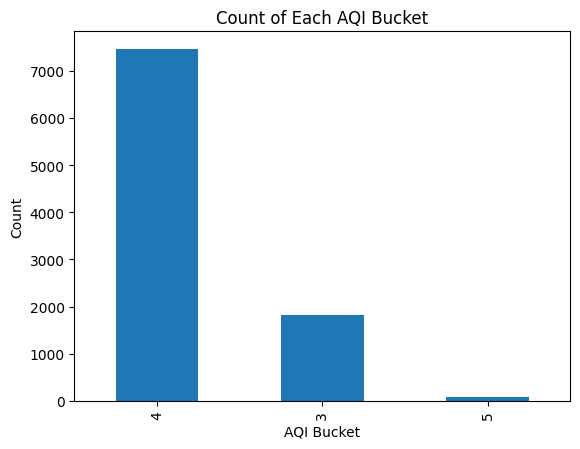

In [27]:
value_counts = df['AQI_bucket_calculated'].value_counts()

# Plot the counts
value_counts.plot(kind='bar')
plt.title('Count of Each AQI Bucket')
plt.xlabel('AQI Bucket')
plt.ylabel('Count')
plt.show()

# Summary of AQA
1. We found most of the data set have label 4 which mean, most of the rows represent Very Poor Air quality. After that next lavel is 3 that mean Poor air index and some are Severe index.

2. Other's 3 label are missing in this dataset. Thefore we need to make model wich will predict this 3 label.

# Training and Test data selecting


In [28]:
data_df = df[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
              'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'AQI_bucket_calculated']]

data_df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,AQI_bucket_calculated
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,7.578,5
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,7.255,5
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,7.502,5
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,7.867,5
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,7.888,5


### As we have most of the dataset label is 3, so this is imblance dataset. Therefore we must need to split dataset based on label value nor random value.

Here, iterate each label and split 80% for train and 20% data for test. So that both test and train have all 3 labels

In [29]:
np.random.seed(100)
# Normalize data

# data_df =  data_df/ data_df.abs().max()

# Randomize the rows
df_randomized = data_df.sample(frac=1, random_state=42)  # Set a random_state for reproducibility
train_ratio = 0.8

# Assuming your target column is named 'AQI_bucket_calculated'
X = df_randomized.drop(columns=['AQI_bucket_calculated'])
y = df_randomized['AQI_bucket_calculated']

# Get unique levels present in the data
unique_levels = y.unique()

# Initialize empty DataFrames for train and test sets
train_set = pd.DataFrame()
test_set = pd.DataFrame()

# Loop through each level and split data based on level if available
for level in unique_levels:
    level_data = df_randomized[y == level]

    # Calculate the number of samples to include in the training set
    train_size_level = int(train_ratio * len(level_data))

    # Split the level_data into train and test sets
    train_level, test_level = level_data.iloc[:train_size_level], level_data.iloc[train_size_level:]

    # Append the level-specific splits to the overall train and test sets
    # Concatenate the level-specific splits to the overall train and test sets
    train_set = pd.concat([train_set, train_level])
    test_set = pd.concat([test_set, test_level])

# Shuffle the train and test sets to ensure randomness
train_set = train_set.sample(frac=1, random_state=42)
test_set = test_set.sample(frac=1, random_state=42)

# Verify the distribution of levels in the train and test sets
print("Train Set Distribution:")
print(train_set['AQI_bucket_calculated'].value_counts())

print("\nTest Set Distribution:")
print(test_set['AQI_bucket_calculated'].value_counts())

Train Set Distribution:
4    5968
3    1456
5      60
Name: AQI_bucket_calculated, dtype: int64

Test Set Distribution:
4    1492
3     365
5      16
Name: AQI_bucket_calculated, dtype: int64


### One hot encoding for categorial classfication

In [30]:
np.random.seed(100)

X_train = train_set.drop(['AQI_bucket_calculated'], axis=1)
y_train = train_set[['AQI_bucket_calculated']]-3 # -3 for makeing 3-0, 4-1, 5-2 beacuse we have only this label.
# print(y_train.head())
y_train_onehot = pd.get_dummies(y_train, columns=['AQI_bucket_calculated'], prefix='AQI')



y_train_onehot = y_train_onehot.values

print(X_train.shape)
print(y_train_onehot.shape)

X_test = test_set.drop(['AQI_bucket_calculated'], axis=1)
y_test = test_set[['AQI_bucket_calculated']] -3 # # -3 for makeing 3-0, 4-1, 5-2 beacuse we have only this label.

y_test_onehot = pd.get_dummies(y_test, columns=['AQI_bucket_calculated'], prefix='AQI')
# for col in range(3):
#     y_test_onehot[f'AQI_{col}'] = 0
# y_test_onehot = y_test_onehot[sorted(y_test_onehot.columns)]

y_test_onehot = y_test_onehot.values

#Normalize_data between -1 to 1

X_train =  X_train/ X_train.abs().max()
X_test =  X_test/ X_test.abs().max()

print(X_test.shape)
print(y_test_onehot.shape)

(7484, 12)
(7484, 3)
(1873, 12)
(1873, 3)


## Accuracy matrix

In [31]:
def get_accurcy_matrix(y_pred_labels, y_true_labels):
    # Calculate classification metrics
    accuracy = np.mean(y_pred_labels == y_true_labels)

    # Calculate confusion matrix
    confusion_matrix = np.zeros((6, 6))
    for true_label, pred_label in zip(y_true_labels, y_pred_labels):
        confusion_matrix[true_label, pred_label] += 1

    # Calculate precision, recall, and F1 score for each class
    precision = np.zeros(6)
    recall = np.zeros(6)
    f1_score = np.zeros(6)

    for i in range(6):
        tp = confusion_matrix[i, i]
        fp = np.sum(confusion_matrix[:, i]) - tp
        fn = np.sum(confusion_matrix[i, :]) - tp

        # Handle zero denominators
        precision[i] = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall[i] = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    # Average precision, recall, and F1 score over all classes
    avg_precision = np.mean([p for p in precision if p !=0])
    avg_recall = np.mean([r for r in recall if r!=0])
    avg_f1_score = np.mean([f for f in f1_score if f !=0])

    # Print or use the classification metrics as needed
    print()
    print(f"Accuracy: {accuracy}")
    print(f"Average Precision: {avg_precision}")
    print(f"Average Recall: {avg_recall}")
    print(f"Average F1 Score: {avg_f1_score}")

    return accuracy, avg_precision, avg_recall, avg_f1_score

# ***2. ML Model 1***

## ANN

In [32]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        np.random.seed(100)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def softmax_derivative(self, x):
        # Calculate the softmax function
        softmax_output = self.softmax(x)

        # Calculate the Jacobian matrix (derivative of softmax with respect to its input)
        jac_matrix = softmax_output[:, :, np.newaxis] * (np.eye(softmax_output.shape[1])[np.newaxis, :, :] - softmax_output[:, np.newaxis, :])

        return jac_matrix

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        for epoch in tqdm(range(epochs)):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.softmax(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            predicted_output = self.softmax(output_layer_input)

            # Backward pass
            error = y - predicted_output

            # Update weights and biases
            self.weights_hidden_output += hidden_layer_output.T.dot(error) * learning_rate
            self.bias_output += np.sum(error, axis=0, keepdims=True) * learning_rate

            self.weights_input_hidden += X.T.dot((error.dot(self.weights_hidden_output.T)) * np.sum(self.softmax_derivative(hidden_layer_output), axis=1)) * learning_rate
            self.bias_hidden += np.sum((error.dot(self.weights_hidden_output.T)) * np.sum(self.softmax_derivative(hidden_layer_output), axis=1), axis=0, keepdims=True) * learning_rate

    def predict(self, X):
        # Forward pass for prediction
        hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_layer_output = self.softmax(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
        predicted_output = self.softmax(output_layer_input)

        return predicted_output

    def calculate_metrics(self, X_test, y_test):
        y_pred_prob = self.predict(X_test)

        # Convert probabilities to class labels
        y_pred_labels = np.argmax(y_pred_prob, axis=1)
        y_true_labels = np.argmax(y_test, axis=1)

        return get_accurcy_matrix(y_pred_labels, y_true_labels)


In [33]:
ann_model = ANN(input_size=X_train.shape[1], hidden_size=2, output_size=3)
ann_model.fit(X_train.to_numpy(), y_train_onehot, epochs=12, learning_rate=0.00001)

ann_model_accuracy, ann_model_precision, ann_model_recall, ann_model_f1_score = ann_model.calculate_metrics(
    X_test.to_numpy(), y_test_onehot
)

100%|██████████| 12/12 [00:00<00:00, 121.37it/s]


Accuracy: 0.6721836625734117
Average Precision: 0.4782637180797496
Average Recall: 0.48296668992618164
Average F1 Score: 0.48054423861829154


## Evaluation model


In [34]:
X_test_temp = X_test.to_numpy()
X_test_for_print = X_test_temp[0:10]
y_test_onehot_for_print = y_test_onehot[0:10]

for x,y in zip(X_test_for_print, y_test_onehot_for_print):
    pred  = ann_model.predict(x)
    pred_aqi_index = np.argmax(pred) + 3
    actual_aqi_index = np.argmax(y) + 3

    print(f"Actual AQI Index: {AQI_index_map[actual_aqi_index]} -> Predicted AQI Index: {AQI_index_map[pred_aqi_index]}")

Actual AQI Index: Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Poor


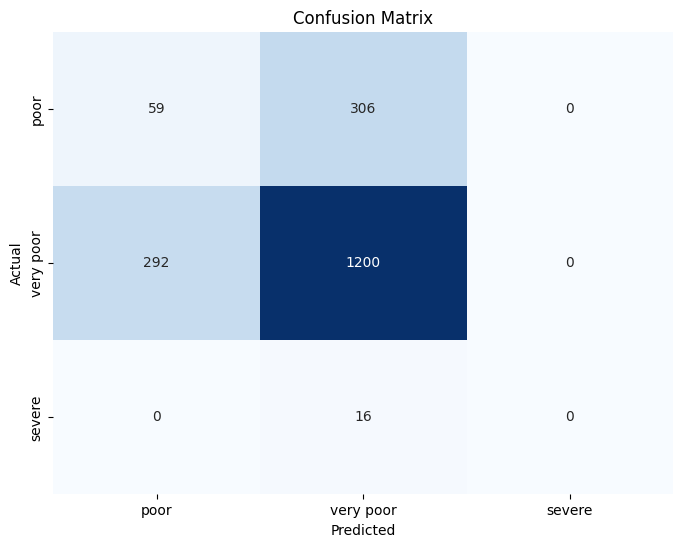

In [35]:
preds = ann_model.predict(X_test)
preds = np.argmax(preds, axis=1)
actuals = np.argmax(y_test_onehot, axis=1)


# Define your class labels and their corresponding names
labels = [0, 1, 2]
class_names = ['poor', 'very poor', 'severe']

# Compute confusion matrix using NumPy
conf_matrix = np.zeros((len(labels), len(labels)), dtype=int)

for actual, pred in zip(actuals, preds):
    conf_matrix[actual, pred] += 1

conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

Row Labels (Actual Classes): The rows represent the actual classes.

Column Labels (Predicted Classes): The columns represent the predicted classes.

In the cell at the intersection of the "poor" row and "poor" column (top-left), there are 59 instances where both the actual and predicted classes are "poor."

In the cell at the intersection of the "very poor" row and "very poor" column (center), there are 1200 instances where both the actual and predicted classes are "very poor."

In the cell at the intersection of the "severe" row and "severe" column (bottom-right), there are 0 instances where both the actual and predicted classes are "severe." Notice dataset have only 16 Sever class, for only this small number all are predicted as Very poor because of imblance data.

# ***3. ML Model 2***

## KNN

In [36]:
import numpy as np

class KNN:
    def __init__(self, k=3):
        np.random.seed(100)
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test, verbose=True):
        predictions = []
        for x in tqdm(X_test, disable=not verbose):
            predictions.append(self._predict(x))
        return np.array(predictions)

    def _predict(self, x):
        # Calculate distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]

        # Get indices of k-nearest training data points
        k_neighbors_indices = np.argsort(distances)[:self.k]

        # Get the labels of the k-nearest training data points
        k_neighbor_labels = [self.y_train[i] for i in k_neighbors_indices]

        # Return the most common class label among the k-nearest neighbors
        most_common = np.bincount(k_neighbor_labels).argmax()
        return most_common

    def calculate_metrics(self, X_test, y_test):
        y_pred = self.predict(X_test)

        y_pred_labels = np.array(y_pred)
        y_true_labels = np.array(y_test)

        return get_accurcy_matrix(y_pred_labels, y_true_labels)



In [37]:
knn_model = KNN(k=3)
knn_model.fit(X_train.to_numpy(), y_train.to_numpy().flatten())
knn_model_accuracy, knn_model_precision, knn_model_recall, knn_model_f1_score = knn_model.calculate_metrics(X_test.to_numpy(), y_test.to_numpy().flatten())

100%|██████████| 1873/1873 [01:11<00:00, 26.14it/s]


Accuracy: 0.8756006406833956
Average Precision: 0.6263876582590032
Average Recall: 0.550497784225152
Average F1 Score: 0.5690405379424602


In [38]:
X_test_temp = X_test.to_numpy()
y_test_temp = y_test.to_numpy()
X_test_for_print = X_test_temp[0:10]
y_test_for_print = y_test_temp[0:10]

for x,y in zip(X_test_for_print, y_test_for_print):
    pred  = knn_model.predict(x, False)
    pred_aqi_index = pred[0]+3
    actual_aqi_index = y[0] + 3

    print(f"Actual AQI Index: {AQI_index_map[actual_aqi_index]} -> Predicted AQI Index: {AQI_index_map[pred_aqi_index]}")

Actual AQI Index: Poor -> Predicted AQI Index: Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor


100%|██████████| 1873/1873 [01:12<00:00, 25.68it/s]


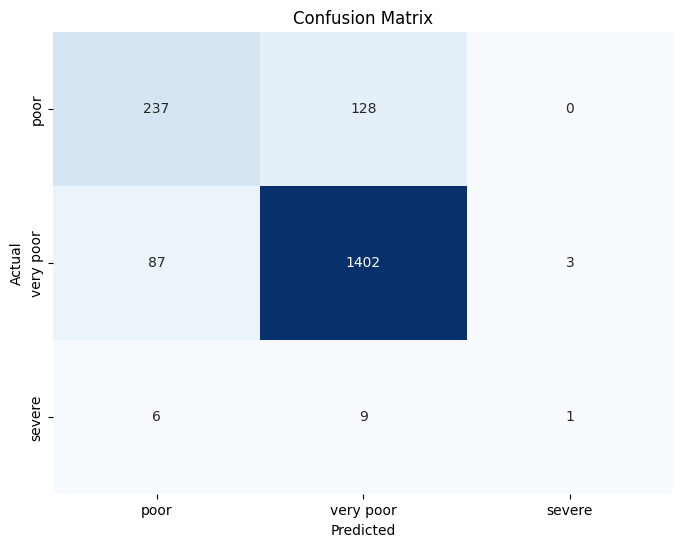

In [39]:
preds = knn_model.predict(X_test.to_numpy())
actuals = y_test.to_numpy()


# Define your class labels and their corresponding names
labels = [0, 1, 2]
class_names = ['poor', 'very poor', 'severe']

# Compute confusion matrix using NumPy
conf_matrix = np.zeros((len(labels), len(labels)), dtype=int)

for actual, pred in zip(actuals, preds):
    conf_matrix[actual[0], pred] += 1

conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

Row Labels (Actual Classes): The rows represent the actual classes.

Column Labels (Predicted Classes): The columns represent the predicted classes.

In the cell at the intersection of the "poor" row and "poor" column (top-left), there are 237 instances where both the actual and predicted classes are "poor."

In the cell at the intersection of the "very poor" row and "very poor" column (center), there are 1402 instances where both the actual and predicted classes are "very poor."

In the cell at the intersection of the "severe" row and "severe" column (bottom-right), there are 1 instances where both the actual and predicted classes are "severe." Notice dataset have only 16 Sever class, for only this small number one as prediced rightly and others are predicted wrongly.

# ***4. ML Model 3***

## RandomForest

In [40]:
class DecisionTree:
    def __init__(self, output_class, max_depth=None):
        self._output_class = output_class
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y_proba, depth=0):
        self.tree = self._fit(X, y_proba, depth)
        return self.tree

    def _fit(self, X, y_proba, depth=0):
        if depth == self.max_depth or np.all(np.sum(y_proba, axis=0) == 0):
            # Create a leaf node
            return {'value': np.sum(y_proba, axis=0) / np.sum(y_proba), 'is_leaf': True}

        num_features = X.shape[1]
        # Select the best split based on Gini impurity for multi-class classification
        best_feature, best_value = self.find_best_split(X, y_proba, num_features)

        if best_feature is None:
            # Create a leaf node
            return {'value': np.sum(y_proba, axis=0) / np.sum(y_proba), 'is_leaf': True}

        # Split the data
        left_mask = X[:, best_feature] <= best_value
        right_mask = ~left_mask

        # Recursively build the tree
        left_subtree = self._fit(X[left_mask], y_proba[left_mask], depth + 1)
        right_subtree = self._fit(X[right_mask], y_proba[right_mask], depth + 1)

        # Save the split information
        return {'feature_index': best_feature,
                'split_value': best_value,
                'left': left_subtree,
                'right': right_subtree,
                'is_leaf': False,
                'value': None}  # Add the 'value' key for non-leaf nodes

    def find_best_split(self, X, y_proba, num_features):
        best_feature, best_value, best_gini = None, None, float('inf')

        for feature in range(num_features):
            feature_values = np.unique(X[:, feature])
            for value in feature_values:
                left_mask = X[:, feature] <= value
                right_mask = ~left_mask

                if np.sum(left_mask) > 0 and np.sum(right_mask) > 0:
                    gini = self.gini_impurity(y_proba[left_mask], y_proba[right_mask])
                    if np.any(gini < best_gini):
                        best_feature, best_value, best_gini = feature, value, gini

        return best_feature, best_value

    def gini_impurity(self, left, right):
        total_samples_left = np.sum(left, axis=0)
        total_samples_right = np.sum(right, axis=0)
        total_samples = total_samples_left + total_samples_right

        gini_right = 1.0 - np.sum((right / np.where(total_samples_right == 0, 1, total_samples_right))**2, axis=0)
        gini_left = 1.0 - np.sum((left / np.where(total_samples_left == 0, 1, total_samples_left))**2, axis=0)

        gini = (total_samples_left / total_samples) * gini_left + (total_samples_right / total_samples) * gini_right
        return gini

    def predict_proba(self, sample):
        if self.tree is None:
            raise ValueError("Decision tree not fitted")

        return self._predict_sample(sample)['value']

    def _predict_sample(self, sample):
        current_node = self.tree

        while not current_node['is_leaf']:
            split_value = current_node['split_value']
            feature_value = sample[current_node['feature_index']]

            if feature_value <= split_value:
                current_node = current_node['left']
            else:
                current_node = current_node['right']

        return current_node

In [41]:
class RandomForest:
    def __init__(self, n_trees=100, max_depth=None, sample_size=None, output_class=3):
        np.random.seed(100)
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []
        self._output_class = output_class

    def fit(self, X, y):
        y_proba = self.calculate_class_probabilities(y)
        for _ in tqdm(range(self.n_trees)):
            tree = DecisionTree(output_class=self._output_class, max_depth=self.max_depth)
            sample_indices = np.random.choice(len(X), size=self.sample_size, replace=True)
            xx = X[sample_indices]
            yy = y_proba[sample_indices]
            tree.fit(xx, yy)
            self.trees.append(tree)

    def calculate_class_probabilities(self, y_int):
        # Convert integer labels to one-hot encoded class probabilities
        return np.eye(self._output_class)[y_int]

    def predict_proba(self, X):
        predictions = np.zeros((X.shape[0], self.n_trees, self._output_class))
        for i, tree in enumerate(self.trees):
            predictions[:, i, :] = [tree.predict_proba(sample) for sample in X]

        # Sum probabilities across trees
        return np.sum(predictions, axis=1) / self.n_trees

    def calculate_error(self, X_test, y_test):
        y_pred = self.predict_proba(X_test)

        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.array(y_test)

        return get_accurcy_matrix(y_pred_labels, y_true_labels)

In [42]:
rf_model = RandomForest(n_trees=10, max_depth=3, sample_size=len(X_train.to_numpy()), output_class=3)
rf_model.fit(X_train.to_numpy(), y_train.astype(int).to_numpy().flatten())
rf_model_accuracy, rf_model_precision, rf_model_recall, rf_model_f1_score = rf_model.calculate_error(X_test.to_numpy(), y_test.astype(int).to_numpy())

 10%|█         | 1/10 [00:28<04:14, 28.32s/it]<ipython-input-40-021c7890a30b>:64: RuntimeWarning: invalid value encountered in divide
  gini = (total_samples_left / total_samples) * gini_left + (total_samples_right / total_samples) * gini_right
100%|██████████| 10/10 [04:34<00:00, 27.40s/it]


Accuracy: 0.7818053441022266
Average Precision: 0.7637312296232837
Average Recall: 0.5411840317308751
Average F1 Score: 0.526209415816478


In [43]:
X_test_temp = X_test.to_numpy()
y_test_temp = y_test.to_numpy()
X_test_for_print = X_test_temp[0:10]
y_test_for_print = y_test_temp[0:10]

for x,y in zip(X_test_for_print, y_test_for_print):
    x = x.reshape(1, -1)
    pred  = rf_model.predict_proba(x)
    pred = np.argmax(pred, axis=1)
    pred_aqi_index = pred[0]+3
    actual_aqi_index = y[0] + 3

    print(f"Actual AQI Index: {AQI_index_map[actual_aqi_index]} -> Predicted AQI Index: {AQI_index_map[pred_aqi_index]}")

Actual AQI Index: Poor -> Predicted AQI Index: Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor


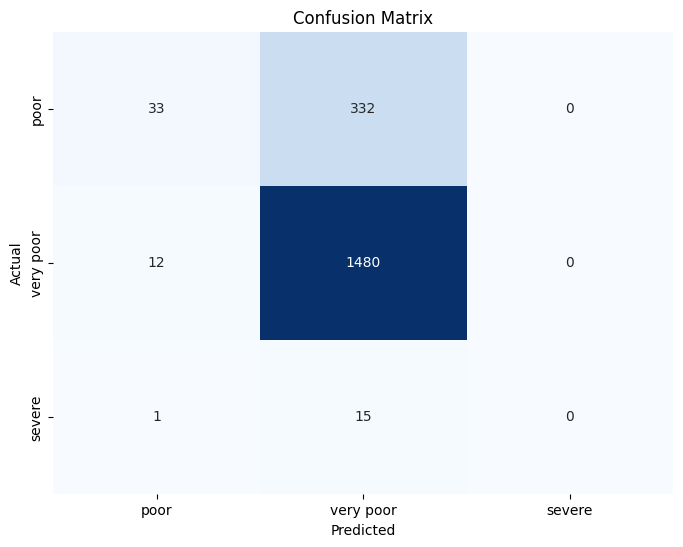

In [44]:
preds = rf_model.predict_proba(X_test.to_numpy())
preds = np.argmax(preds, axis=1)
actuals = y_test.to_numpy()


# Define your class labels and their corresponding names
labels = [0, 1, 2]
class_names = ['poor', 'very poor', 'severe']

# Compute confusion matrix using NumPy
conf_matrix = np.zeros((len(labels), len(labels)), dtype=int)

for actual, pred in zip(actuals, preds):
    conf_matrix[actual[0], pred] += 1

conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary
Row Labels (Actual Classes): The rows represent the actual classes.

Column Labels (Predicted Classes): The columns represent the predicted classes.

In the cell at the intersection of the "poor" row and "poor" column (top-left), there are 33 instances where both the actual and predicted classes are "poor."

In the cell at the intersection of the "very poor" row and "very poor" column (center), there are 1480 instances where both the actual and predicted classes are "very poor."

In the cell at the intersection of the "severe" row and "severe" column (bottom-right), there are 1 instances where both the actual and predicted classes are "severe." Notice dataset have only 16 Sever class, for only this small number one as prediced rightly and others are predicted wrongly.

# ***5. ML Model 4 (Based on research literature)***

## XGBoostRegressor

In [45]:
class XGBoostClassifier:
    def __init__(self, n_estimators=100, output_class=3, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self._output_class = output_class

    def fit(self, X, y):
        y_proba = self.calculate_class_probabilities(y)
        # print(y_proba)

        for i in tqdm(range(self.n_estimators)):
            tree = DecisionTree(output_class=self._output_class, max_depth=self.max_depth)
            tree.fit(X, y_proba)  # Pass class probabilities to the tree
            self.trees.append(tree)

            # Update pseudo-residuals for the next iteration
            residuals = y_proba - self.learning_rate*self.predict_proba(X)
            y_proba = residuals

    def calculate_class_probabilities(self, y_int):
        # Convert integer labels to one-hot encoded class probabilities
        return np.eye(self._output_class)[y_int]

    def predict_proba(self, X):
        # Aggregate predictions from all trees
        predictions = np.zeros((X.shape[0], len(self.trees), self._output_class))

        for i, tree in enumerate(self.trees):
            predictions[:, i, :] = [tree.predict_proba(sample) for sample in X]

        # Sum probabilities across trees
        return np.sum(predictions, axis=1) / len(self.trees)

    def calculate_error(self, X_test, y_test):
        y_pred = self.predict_proba(X_test)

        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.array(y_test)

        return get_accurcy_matrix(y_pred_labels, y_true_labels)


In [46]:
xgb_model = XGBoostClassifier(n_estimators=10, learning_rate=0.01, max_depth=3)
xgb_model.fit(X_train.to_numpy(), y_train.to_numpy().astype(int).flatten())
xgb_model_accuracy, xgb_model_precision, xgb_model_recall, xgb_model_f1_score = xgb_model.calculate_error(X_test.to_numpy(), y_test.to_numpy().flatten())

  0%|          | 0/10 [00:00<?, ?it/s]<ipython-input-40-021c7890a30b>:64: RuntimeWarning: invalid value encountered in divide
  gini = (total_samples_left / total_samples) * gini_left + (total_samples_right / total_samples) * gini_right
100%|██████████| 10/10 [07:03<00:00, 42.37s/it]


Accuracy: 0.7965830218900161
Average Precision: 0.7965830218900161
Average Recall: 1.0
Average F1 Score: 0.886775631500743


In [47]:
X_test_temp = X_test.to_numpy()
y_test_temp = y_test.to_numpy()
X_test_for_print = X_test_temp[0:10]
y_test_for_print = y_test_temp[0:10]

for x,y in zip(X_test_for_print, y_test_for_print):
    x = x.reshape(1, -1)
    pred  = xgb_model.predict_proba(x)
    pred = np.argmax(pred, axis=1)
    pred_aqi_index = pred[0]+3
    actual_aqi_index = y[0] + 3

    print(f"Actual AQI Index: {AQI_index_map[actual_aqi_index]} -> Predicted AQI Index: {AQI_index_map[pred_aqi_index]}")

Actual AQI Index: Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor
Actual AQI Index: Very Poor -> Predicted AQI Index: Very Poor


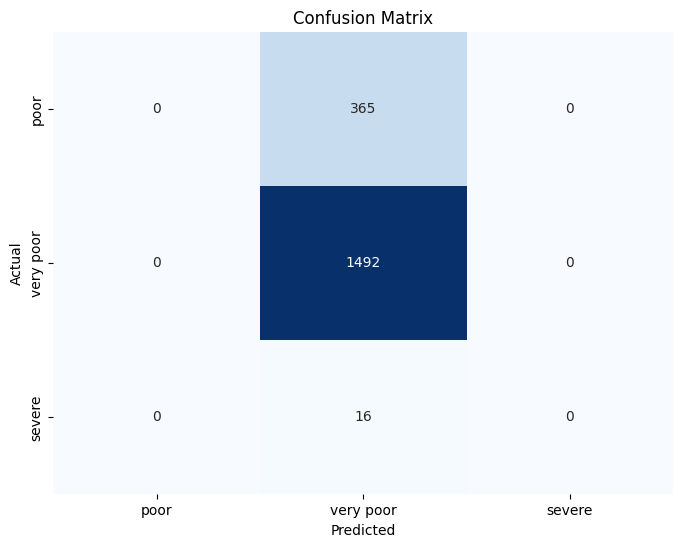

In [48]:
preds = xgb_model.predict_proba(X_test.to_numpy())
preds = np.argmax(preds, axis = 1)
actuals = y_test.to_numpy()


# Define your class labels and their corresponding names
labels = [0, 1, 2]
class_names = ['poor', 'very poor', 'severe']

# Compute confusion matrix using NumPy
conf_matrix = np.zeros((len(labels), len(labels)), dtype=int)

for actual, pred in zip(actuals, preds):
    conf_matrix[actual[0], pred] += 1

conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Visualize the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary
Row Labels (Actual Classes): The rows represent the actual classes.

Column Labels (Predicted Classes): The columns represent the predicted classes.

In the cell at the intersection of the "poor" row and "poor" column (top-left), there are 0 instances where both the actual and predicted classes are "poor."

In the cell at the intersection of the "very poor" row and "very poor" column (center), there are 1492 instances where both the actual and predicted classes are "very poor."

In the cell at the intersection of the "severe" row and "severe" column (bottom-right), there are 1 instances where both the actual and predicted classes are "severe." Notice dataset have only 16 Sever class, for only this small number one as prediced rightly and others are predicted wrongly.

# ***6. Comparison of insights drawn from the models***

Text(0.5, 1.0, 'Average F1 Score')

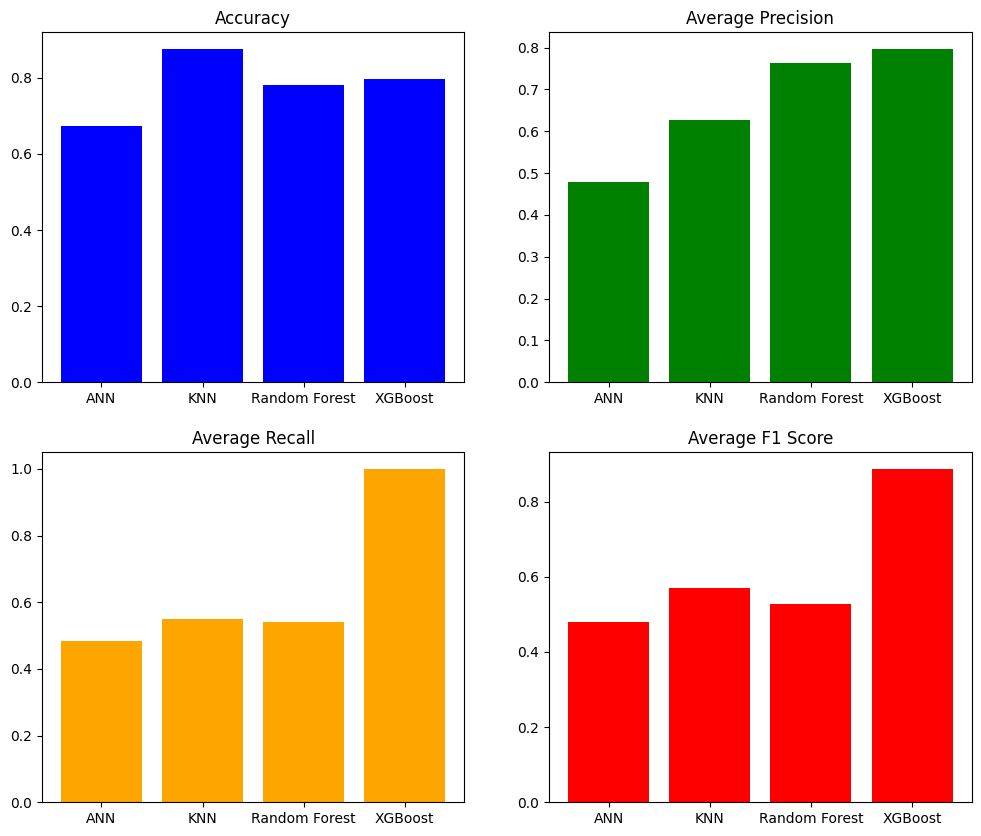

In [49]:
# Model names
models = ['ANN', 'KNN', 'Random Forest', 'XGBoost']
# Performance metrics
accuracy = [ann_model_accuracy, knn_model_accuracy, rf_model_accuracy, xgb_model_accuracy ]
avg_precision = [ann_model_precision, knn_model_precision, rf_model_precision,xgb_model_precision]
avg_recall = [ann_model_recall, knn_model_recall, rf_model_recall, xgb_model_recall]
avg_f1_score = [ann_model_f1_score, knn_model_f1_score, rf_model_f1_score, xgb_model_f1_score]

# print(accuracy)
# print(avg_precision)
# print(avg_recall)
# print(avg_f1_score)

# Individual bar graphs
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Accuracy
axs[0, 0].bar(models, accuracy, color='blue')
axs[0, 0].set_title('Accuracy')

# Average Precision
axs[0, 1].bar(models, avg_precision, color='green')
axs[0, 1].set_title('Average Precision')

# Average Recall
axs[1, 0].bar(models, avg_recall, color='orange')
axs[1, 0].set_title('Average Recall')

# Average F1 Score
axs[1, 1].bar(models, avg_f1_score, color='red')
axs[1, 1].set_title('Average F1 Score')

## Model Recommendation Summary
### KNN:

Accuracy (0.876): KNN demonstrates the highest accuracy, indicating strong overall predictive performance.
Precision (0.626), Recall (0.550), F1 Score (0.569): KNN shows moderate precision, recall, and F1 Score.
Consideration: Suitable for scenarios where high accuracy is a priority, and a balanced trade-off between precision and recall is acceptable.
###ANN:

Accuracy (0.672): ANN has a lower accuracy compared to other models.
Precision (0.478), Recall (0.483), F1 Score (0.481): ANN exhibits balanced precision, recall, and F1 Score.
Consideration: Despite lower accuracy, ANN is well-balanced, making it suitable for scenarios where a balance between precision and recall is crucial.
### Random Forest:

Accuracy (0.782): Random Forest achieves a good level of accuracy.
Precision (0.764), Recall (0.541), F1 Score (0.526): Random Forest shows a trade-off between precision and recall.
Consideration: Suitable for scenarios where a balance between precision and recall is important, and high accuracy is desirable.
### XGBoost:

Accuracy (0.797): XGBoost demonstrates a high level of accuracy.
Precision (0.797), Recall (1.0), F1 Score (0.887): XGBoost exhibits high precision, recall, and F1 Score.
Consideration: Suitable for scenarios where high accuracy and a strong balance between precision and recall are critical.
## Overall Recommendations:
### For High Accuracy:

Choose XGBoost for the highest accuracy, precision, recall, and F1 Score.
###For a Balance Between Precision and Recall:

Consider Random Forest for a trade-off between precision and recall.
### For a Balanced Approach:

ANN exhibits a balanced performance and may be suitable for scenarios where a balance between precision and recall is crucial.

# **_7. References_**
1. [Dataset](https://docs.google.com/spreadsheets/d/1krSVpZPR_9H29m8DFayIRz1eGYPihJXr_HzD2ibaVRk/edit#gid=0)
2.   [AQI Index](https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/)
3. [Paper for AQI](https://www.hindawi.com/journals/jeph/2023/4916267/)
4.   [XGBoost](https://github.com/Ekeany/XGBoost-From-Scratch/blob/master/Naive-Gradient-Boosting.py)
5. [AQI Calculation](https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial)
6.[ANN tutorial](https://www.kdnuggets.com/2019/11/build-artificial-neural-network-scratch-part-1.html)
7. [KNN tutorial](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)
8. [Random Forest](https://www.simplilearn.com/tutorials/machine-learning-tutorial/random-forest-algorithm)
9. [XGBoost tutorial](https://www.datacamp.com/tutorial/xgboost-in-python)
10. [Random Forest Turorial](https://carbonati.github.io/posts/random-forests-from-scratch/)
11. [XGBoost implementaiton Example](https://github.com/Ekeany/XGBoost-From-Scratch)